### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
%matplotlib inline

#### 1. Import the necessary packages - 2.5 marks

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
df1 = pd.read_csv('Data.csv')
df2 = pd.read_csv('item.csv')
df3 = pd.read_csv('user.csv')


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
df1.shape

(100000, 4)

In [6]:
df1.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [7]:
df1.isna().apply(pd.value_counts)

,user id,movie id,rating,timestamp
False,100000,100000,100000,100000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [9]:
df2.shape

(1681, 22)

In [10]:
df2.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df2.isna().apply(pd.value_counts)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,...,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [13]:
df3.shape

(943, 5)

In [14]:
df3.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [15]:
df3.isna().apply(pd.value_counts)

,user id,age,gender,occupation,zip code
False,943,943,943,943,943


#### 4. Find the number of movies per genre using the item data - 5 marks

In [16]:
df2[['unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].sum()


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [17]:
df2['genre_count']= df2['unknown']+df2['Action']+df2['Adventure']+df2['Animation']+df2['Childrens']+df2['Comedy']+df2['Crime']+df2['Documentary']+df2['Drama']+df2['Film-Noir']+df2['Horror']+df2['Musical']+df2['Mystery']+df2['Romance']+df2['Sci-Fi']+df2['Thriller']+df2['War']+df2['Western']
more_than_one_genre = df2['genre_count'] > 1
df2[more_than_one_genre][['movie id', 'movie title','genre_count']]

,movie id,movie title,genre_count
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [18]:
df2.drop(df2[df2['unknown']==1].index, inplace=True)
df2.shape

(1680, 23)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [19]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [20]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [21]:
df2['release year']=df2['release date'].str.split('-').str.get(2)#your answers here


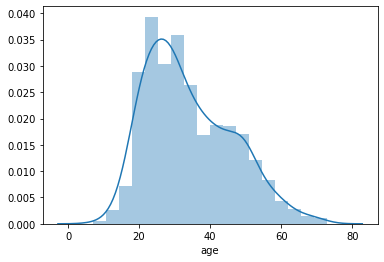

In [22]:
sns.distplot(df3['age']);

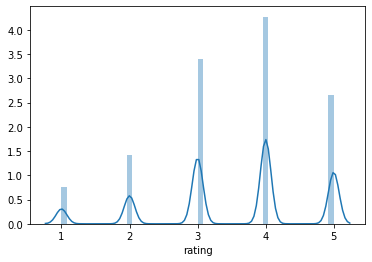

In [23]:
sns.distplot(df1['rating']);

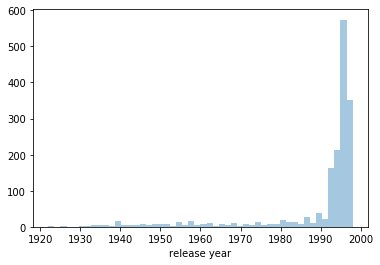

In [24]:
sns.distplot(df2['release year'], kde=False);

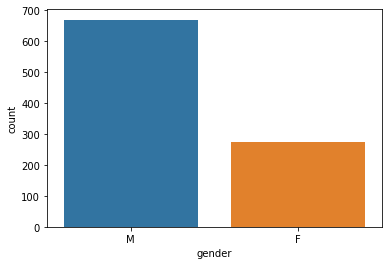

In [25]:
sns.countplot(df3['gender']);

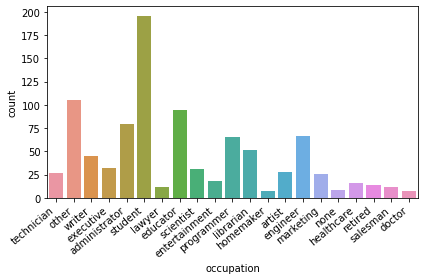

In [26]:
oc = sns.countplot(df3['occupation']);
# plt.figure(figsize=(4,1))
oc.set_xticklabels(oc.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [27]:
df22=df2.set_index('release year').loc[:,'Action':'Western'].groupby('release year').sum()
df22.tail()


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1998,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0


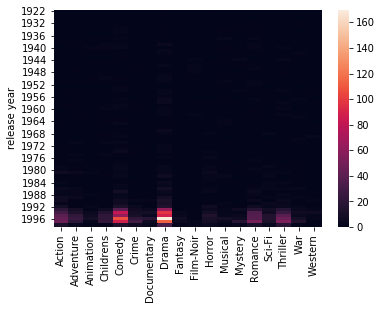

In [28]:
sns.heatmap(df22);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [29]:
df11= df1.groupby('movie id', as_index=False)['rating'].count() #your answer here
df111=df11[(df11.rating > 100)]
df111.tail()

,movie id,rating
925,926,101
927,928,104
1015,1016,137
1027,1028,148
1046,1047,134


In [30]:

df1111=pd.merge(df111,df2[['movie id','movie title']], on='movie id', how='inner')
df1111.head()


,movie id,rating,movie title
0,1,452,Toy Story
1,2,131,GoldenEye
2,4,209,Get Shorty
3,7,392,Twelve Monkeys
4,8,219,Babe


In [31]:
df1.tail()

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


In [32]:
movielist = list(df1111['movie title'])
len(movielist)

334

In [33]:
df1_av=pd.merge(df1111[['movie id','movie title']],df1[['movie id','rating']], on='movie id', how='inner')
df1_av.tail()

,movie id,movie title,rating
64414,1047,Multiplicity,2
64415,1047,Multiplicity,1
64416,1047,Multiplicity,3
64417,1047,Multiplicity,2
64418,1047,Multiplicity,2


In [34]:
av = df11= df1.groupby('movie id', as_index=False)['rating'].count() 
r1=df1_av.groupby('movie title', as_index=False)['rating'].mean()
result1 = r1.sort_values(by='rating', ascending=False).head(25)['movie title'].isin(movielist)
r1.sort_values(by='rating', ascending=False).head(25)

,movie title,rating
63,"Close Shave, A",4.491071
259,Schindler's List,4.466443
330,"Wrong Trousers, The",4.466102
54,Casablanca,4.456790
268,"Shawshank Redemption, The",4.445230
247,Rear Window,4.387560
318,"Usual Suspects, The",4.385768
290,Star Wars,4.358491
1,12 Angry Men,4.344000
59,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


In [35]:
df3.tail()

,user id,age,gender,occupation,zip code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [36]:
df2.tail(3)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count,release year
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1994
1680,1682,Scream of Stone (Schrei aus Stein),08-Mar-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1996


In [37]:
df1.tail()

,user id,movie id,rating,timestamp
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156
99999,12,203,3,879959583


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [38]:
a=pd.merge(df1,df3,on='user id',how='left')
a

,user id,movie id,rating,timestamp,age,gender,occupation,zip code
0,196,242,3,881250949,49,M,writer,55105
1,186,302,3,891717742,39,F,executive,00000
2,22,377,1,878887116,25,M,writer,40206
3,244,51,2,880606923,28,M,technician,80525
4,166,346,1,886397596,47,M,educator,55113
...,...,...,...,...,...,...,...,...
99995,880,476,3,880175444,13,M,student,83702
99996,716,204,5,879795543,36,F,administrator,44265
99997,276,1090,1,874795795,21,M,student,95064
99998,13,225,2,882399156,47,M,educator,29206


In [39]:
b=pd.merge(df2,a,on='movie id', how='inner')


In [40]:
c=b.set_index('gender').loc[:,'Action':'rating'].groupby('gender').sum()
c

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genre_count,user id,rating
gender,,,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,...,1442,1314,5858,2629,5086,2189,371,53338,12225832,90894
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,...,3512,3931,13603,10101,16786,7209,1483,157895,34019655,262060


In [41]:
c.at['F','Drama'] / c.at['M','Drama']*100

38.107107003150205

In [42]:
c.at['F','Sci-Fi'] / c.at['M','Sci-Fi']*100

26.02712602712603

In [43]:
c.at['F','Romance'] / c.at['M','Romance']*100

43.06402999338381

Conclusion:
Men watch more drama than women - Correct 
Women watch more Sci-Fi than men - Not correct
Men watch more Romance than women - Correct